In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
tk = th.Thicket.from_caliperreader(glob("cuda-cali/t*-n65536-i0.cali") + glob("cuda-cali/t*-s65536-i0.cali") + glob("cuda-cali/SS-CUDA-i0-*-s65536.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time", "Avg GPU time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"

In [5]:
gb = tk.groupby("Algorithm")

3  thickets created...
{'Bitonic Sort': <thicket.thicket.Thicket object at 0x2b4c09821100>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b4c0942a850>, 'SampleSort': <thicket.thicket.Thicket object at 0x2b4c09469970>}


In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [8]:
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


<ipython-input-8-0565b98de86a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)


In [9]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [10]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    lines = ax.plot(
        df,
        marker='o',
    )
    legend_labels = [label[0] for label in df.columns]
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(lines, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    #plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_threads)
    plt.show()
    return fig, ax

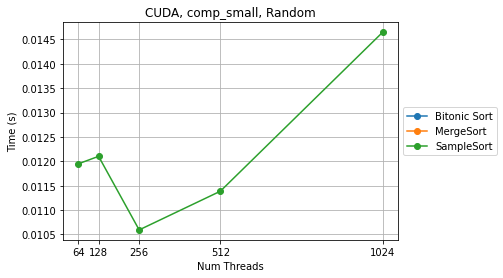

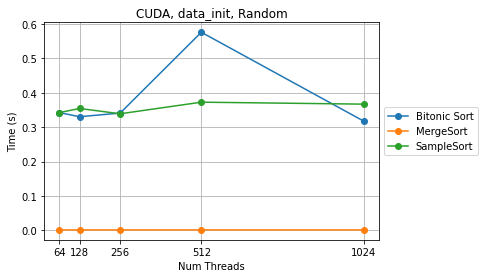

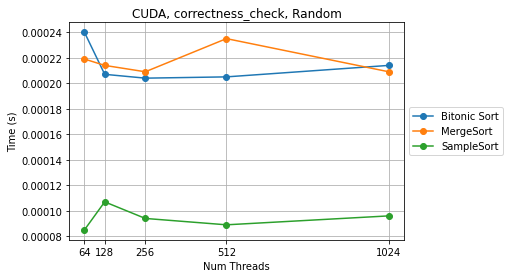

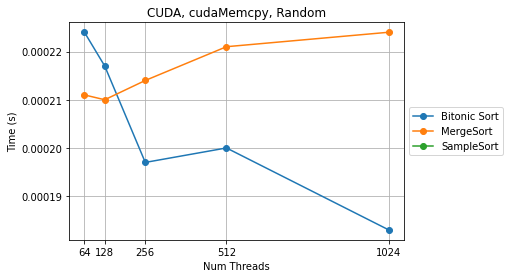

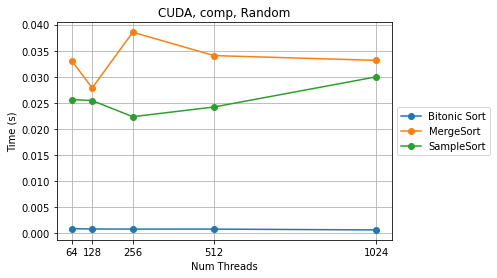

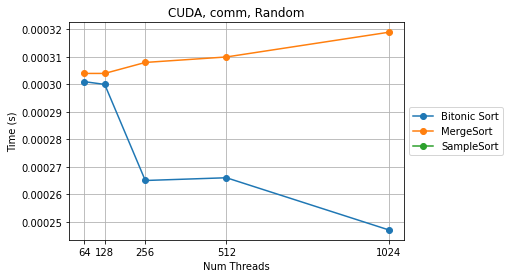

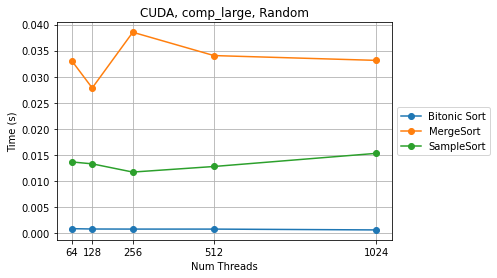

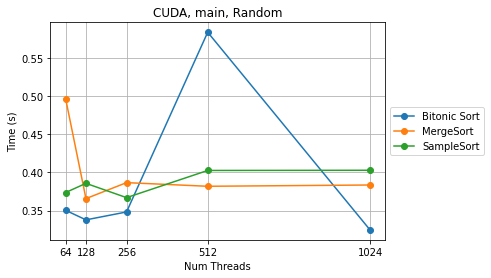

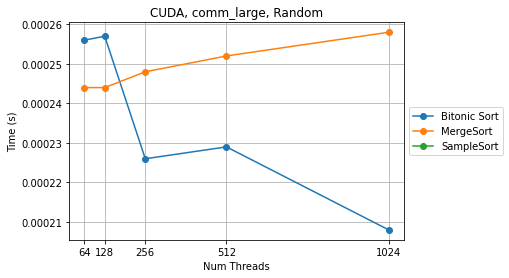

In [11]:
for name in function_names:
#         if name == 'main' or name == 'main_function':
#             continue
        plot_mpl(
            df=ctk.dataframe.loc[name],
            title=f"CUDA, {name}, Random", 
            xlabel="Num Threads",
            ylabel="Time (s)",
        )